### Paralelización trivial con threads

Ese ejemplo evoluciona un gran número de ecuaciones independientes donde solo hay un cambio en un parámetro externo propio de cada ecuación y elejido al azar en el intervalo $[0,2\pi]$

El sistema es:

$$
\frac{dy_j}{dt} = f(y_j,t,a_j) = i*a_j*y_j + \sin(2\pi t)
$$

Para la evolución temporal y por simplicidad usamos Euler.

In [1]:
using Base.Threads
using BenchmarkTools
using Plots

In [2]:
n_threads = nthreads()

2

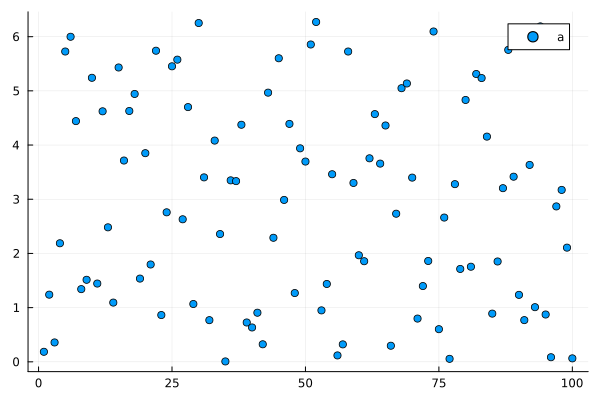

In [3]:
N = 100
M = 100

a = 2π*rand(N)

scatter(a, label="a")

In [4]:

function f(y,t,a)
    return  im*a.*y .+ sin(2π*t)
end

dt = 0.01
t = zeros(M)
y = ones(ComplexF64,N,M)

for j in 2:M
    t[j] = t[j-1] + dt
    @threads for i in 1:N
        y[i,j] = y[i,j-1] + f(y[i,j-1],t[j-1],a[i])*dt
    end
end


┌ Info: Saved animation to /Users/reula/Docencia/jupyter-ccad/anim_fps5.gif
└ @ Plots /Users/reula/.julia/packages/Plots/tDI0A/src/animation.jl:156


Plots.AnimatedGif("/Users/reula/Docencia/jupyter-ccad/anim_fps5.gif")
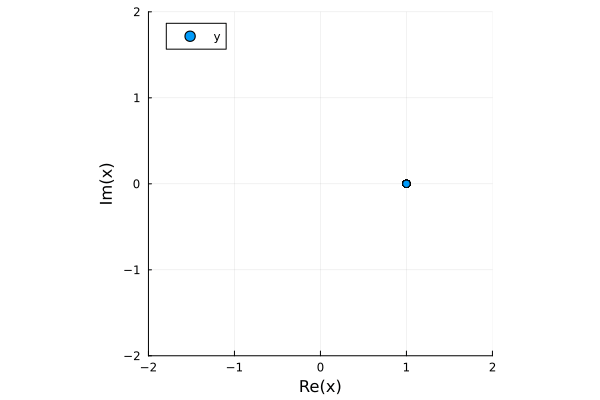

In [5]:
anim = @animate for j in 1:M
    scatter(y[:,j], label="y", aspect_ratio=:equal, legend=:topleft, xlim=(-2,2), ylim=(-2,2))
end

gif(anim, "anim_fps5.gif", fps = 5)

In [6]:
function evolve(f,y,t,a,dt)   
    for j in 2:M
        t[j] = t[j-1] + dt
        @threads for i in 1:N
            y[i,j] = y[i,j-1] + f(y[i,j-1],t[j-1],a[i])*dt
        end
    end
    return y[:,:], t[:]
end

evolve (generic function with 1 method)

In [7]:
@btime evolve(f,y,t,a,dt)

  1.946 ms (1997 allocations: 290.64 KiB)


(ComplexF64[1.0 + 0.0im 1.0 + 0.0018477200013420742im … 0.9831746823953507 + 0.20938918940837534im 0.981534457466373 + 0.21120582093385037im; 1.0 + 0.0im 1.0 + 0.012389935619835889im … 0.24850070601066102 + 1.1058694294381528im 0.23354572264033466 + 1.1089483371871087im; … ; 1.0 + 0.0im 1.0 + 0.021067375233643913im … -0.7438984523370785 + 1.0750859140060114im -0.7678010230314912 + 1.0594139261748992im; 1.0 + 0.0im 1.0 + 0.0006353452450652826im … 0.9996646305155398 + 0.07232676411066796im 0.9983653457142281 + 0.07296189628032596im], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007])

In [8]:
function evolve_sf(f,y,t,a,dt)   
    for j in 2:M
        t[j] = t[j-1] + dt
        y[:,j] = y[:,j-1] + f(y[:,j-1],t[j-1],a[:])*dt
    end
    return y[:,:], t[:]
end

evolve_sf (generic function with 1 method)

In [9]:
@btime evolve_sf(f,y,t,a,dt)

  359.396 μs (3668 allocations: 1.32 MiB)


(ComplexF64[1.0 + 0.0im 1.0 + 0.0018477200013420742im … 0.9831746823953507 + 0.20938918940837534im 0.981534457466373 + 0.21120582093385037im; 1.0 + 0.0im 1.0 + 0.012389935619835889im … 0.24850070601066102 + 1.1058694294381528im 0.23354572264033466 + 1.1089483371871087im; … ; 1.0 + 0.0im 1.0 + 0.021067375233643913im … -0.7438984523370785 + 1.0750859140060114im -0.7678010230314912 + 1.0594139261748992im; 1.0 + 0.0im 1.0 + 0.0006353452450652826im … 0.9996646305155398 + 0.07232676411066796im 0.9983653457142281 + 0.07296189628032596im], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007])